![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Funções inversas e algoritmos de cálculo de raízes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 0: Inversa em um intervalo

Se a função $f: [a,b] \to R$ é injetiva em $[a,b]$,
ela possui uma inversa $g$, definida da imagem de $f$ e com valores no intervalo $[a,b]$.

Explique porque $f$ ser contínua e monótona garante que $f(x) = y$
sempre terá uma única raiz para $y$ entre $f(a)$ e $f(b)$.

Conclua que a bisseção sempre funciona neste caso.

#isso é apenas a minha ideia de resposta, podem modificar\
Primeiro, vamos definir a função $h$, de modo que $h(x) = f(x) - y$. Como estamos apenas deslocando o valor de $f(x)$ por y unidades, a função $h$ também será contínua e monótona.
Como $h$ é contínua no intervalo, supondo que $h(a)$ e $h(b)$ tem sinais opostos, o Teorema do Valor Intermediário nos garante que existe $c$, tal que $h(c) = 0$(no caso de $h(a)$ ou $h(b)$ serem $0$, o resultado é imediato).\
Além disso, como $h$ é monótona, isso implica que sua derivada, $h´$, no intervalo, é sempre positiva ou negativa, ou seja, a função é estritamente crescente ou decrescente dentro daquele intervalo, respectivamente.\
Suponha, por absurdo, que exista outro ponto, $d$, tal que $h(d) = 0$.Pelo Teorema de Rolle, existiria um ponto $e$, entre $c$ e $d$, tal que $h´(e) = 0$.\
Entretanto, isso é uma contradição com o fato da função ser monótona.\
Portanto, não pode existir outra raiz de $h$ no intervalo $[a,b]$. Como consequência, há apenas uma raiz para $f$ nesse intervalo.

Com o exposto acima, podemos concluir que de fato a bisseção sempre funciona nesse caso.\
Isso porque, ao dividirmos o intervalo $[a,b]$ na metade, teremos duas opções: ou $h(\frac{a+b}{2})$ é zero, ou não é.\
A primeira opção representa um dos possíveis critérios de término do algoritmo, assim como confirma a existência da raiz.\
Já a segunda, seja o resultado positivo ou negativo, poderemos construir um novo intervalo com  as mesmas propriedades do anterior(basta substituir um dos extremos por $\frac{a+b}{2}$, de modo que $h(extremo)$ possua mesmo sinal que $h(\frac{a+b}{2})$) e que esteja contido nele, ou seja, construiremos intervalos encaixantes.\
Desse modo, teremos intervalos de tamanho tão pequeno quanto se queira($[m - \epsilon, m + \epsilon]$), com as mesmas propriedades do original, o que nos garante a existência da raiz.

Se, além disso, $f$ for derivável, isso garante que o método de Newton vai encontrar uma raiz para $f(x) = y$?

Não garante que o método de Newton encontre uma raiz. Suponha uma função estritamente contínua e crescente nesse intervalo. Se a sua derivada e $x_0$ for tal que $x_1 = x_0 - f(x_0)/f'(x_0)$ e $x_0 = x_1 - f(x_1)/f'(x_1)$ então temos a ocorrência de um ciclo. No entanto, há ainda casos em que existem muito mais pontos entre a repetição do $x_0$, que não são tão difíceis de mostrar.

# Parte 1: Usando a bisseção

## Questão 1: Implementação

Escreva uma função `biss_solve(f, y, a, b)` que encontra a solução de $f(x) = y$ no intervalo $[a,b]$,
supondo que $f$ é contínua e monótona neste intervalo.
Não esqueça de testar que, de fato, tem uma solução!

In [2]:
def biss_solve(f, y, a, b, xtol=1e-8, ytol=1e-8):
    """Bissects the interval  [a,b]  until an approximate solution to  f(x) = y  is found.
    Also returns the number of bissections"""
    #assert (f(a)-y)*(f(b)-y) < 0, 'Não há solução'
    m = (a+b)/2
    nbiss = 1
    #Checar se a função é decrescente
    if f(b) < f(a):
         while not abs(f(m)-y) < ytol or abs(b-a) < xtol:
            if f(m) > y: #Nesse caso, temos que pensar 'ao contrário'
                a = m
            else:
                b = m
            m = (a+b) / 2
            nbiss += 1 
    #Se for crescente        
    else: 
        while not abs(f(m)-y) < ytol or abs(b-a) < xtol:
            if f(m) < y: #Procedimento padrão
                a = m
            else:
                b = m
            m = (a+b) / 2
            nbiss += 1 
    return m, nbiss

### Testes da bisseção

In [3]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(np.arcsin(0.5) - z1) < 1e-8
assert np.sin(z2) <= 1e-8 or abs(np.arcsin(0.5) - z2) < 1e-8

In [4]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert 20 <= n1 <= 30
assert 20 <= n2 <= 30

In [5]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert z1 == z2
assert n1 + 1 == n2

Explique os testes da caixa acima.

Na primeira caixa de testes as chamadas para bisseção é feita com dois intervalos distintos, $z_1 \in [0,\frac{\pi}{2}]$ e $z_2 \in [\frac{-\pi}{2},\frac{\pi}{2}]$. A solução da função $sen(x) = 0.5$ nos fornece um x para o qual sen(x) = 0.5, ou seja, calcula a função inversa do seno: a função arcosseno. Como a solução se encontra na parte positiva, ao incializarmos o algoritmo com o intervalo $[\frac{-\pi}{2},\frac{\pi}{2}]$ na segunda iteração teremos que o próximo intervalo de busca é $[\frac{-\pi}{2},\frac{\pi}{2}]$. Logo, começando com um intervalo que é exatamente metade dele, teremos que o algoritmo necessita de um passo a menos e ambos convergem para o mesmo valor, dado que inevitavelmente ambos recaem no problema de encontrar a raiz partindo do mesmo intervalo. <p>Vale notar também o números de iterações que leva para o algoritmo convergir. No caso em comçamos com o intervalo $[\frac{-\pi}{2},\frac{\pi}{2}]$ temos um intervalo de tamanho igual a $\pi$. Queremos um erro em x na ordem de $1e-8$. Assim, seja o ponto médio $M_n$ do intervalo na n-ésima iteração e $M$ a raiz, logo por construção temos que $|M_n - M|\leq \frac{|a - b|}{2^n}$, independente da função que queremos achar a raiz. Logo precisaríamos resolver a equação $1e-8 \geq \frac{\pi}{2^n}$, o que nos fornece n = 29. Vemos que para n = 20 temos um erro aproximadamente na ordem de $1e-6$ e, para n = 30, $1e-9$, logo certamente a solução tem que estar nesse intervalo. 

### E mais testes...

In [6]:
z1, n1 = biss_solve(np.sin, 0.5, np.pi/2, 3*np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(np.pi - np.arcsin(0.5) - z1) < 1e-8
assert 20 <= n1 <= 30

In [7]:
z1, n1 = biss_solve(np.sin, 0.5, 5*np.pi/2, 3*np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(2*np.pi + np.arcsin(0.5) - z1) < 1e-8
assert 20 <= n1 <= 30

Comente os testes das duas caixas acima.

Na primeira caixa estamos resolvendo x tal que sen(x) = 0.5, no entanto isso é feito para intervalo $[\frac{\pi}{2},\frac{3\pi}{2}]$, embora o domínio da função seno é $[-\frac{\pi}{2},\frac{\pi}{2}]$. Com isso, o resultado que encontrarmos nesse novo intervalo será exatamente a mesma que aquela encontrada para o domínio original acrescida de $\pi$. Assim, se fizermos $\pi - \arcsin(0.5) - z1$, caso encontrássemos a raiz z1 exata, deveria dar 0. No entanto como estamos resolvendo numericamente, encerramos o algoritmo quando essa diferença for menor que $1e-8$. De forma análoga fazemos para a segunda caixa, que é exatamente o domínio com uma volta ($2\pi$) a mais. 

## Questão 2: Gráficos

Varie $y$ no intervalo $[0.05, 0.95]$ e faça o gráfico do número de iterações,
em função de y, para encontrar uma raiz de $\sin(x) = y$ no intervalo $[-\pi/2, \pi/2]$.

Use as tolerâncias padrão.

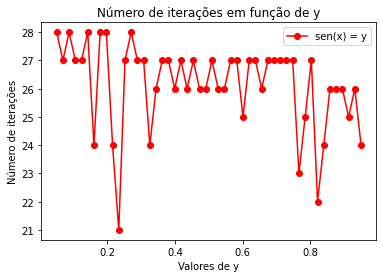

In [8]:
ys = np.linspace(0.05,0.95, num=50)
xs = [biss_solve(np.sin,y,-np.pi/2,np.pi/2)[1] for y in ys]

plt.plot(ys,xs,'ro-',label='sen(x) = y')
plt.title('Número de iterações em função de y')
plt.ylabel('Número de iterações')
plt.xlabel('Valores de y')
plt.legend()

ax = plt.gca()

In [9]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Faça, agora, o gráfico do erro em $x$ (usando `np.arcsin`) e em $y$.

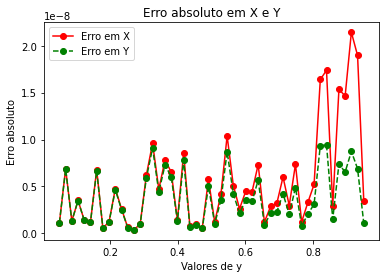

In [10]:
ys = np.linspace(0.05,0.95, num=50)
xs = np.abs([biss_solve(np.sin,y,-np.pi/2,np.pi/2)[0] - np.arcsin(y) for y in ys]) #Erro em x
xs2 = np.abs([np.sin(biss_solve(np.sin,y,-np.pi/2,np.pi/2)[0]) - y for y in ys]) #Erro em y
plt.plot(ys,xs,'ro-',label='Erro em X')
plt.plot(ys,xs2,'go--',label='Erro em Y')
plt.title('Erro absoluto em X e Y')
plt.ylabel('Erro absoluto')
plt.xlabel('Valores de y')
plt.legend()
ax = plt.gca()

In [11]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [12]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você percebe neste gráfico?

Vemos que o erro em X é aproximadamente igual ao erro em y, para todos os valores de y no intervalo 0.05 a 0.95. Isso acontece pois nesse intervalo vale que $sen(x) \approx x$. No entanto, conforme os valores de y aumentam, a diferença entre o erro absoluto em Y e em X também aumentam, uma vez que a aproximação $sen(x) \approx x$ piora conforme mais distante estamos de $x = 0$. 

Faça um gráfico do quociente entre os erros.

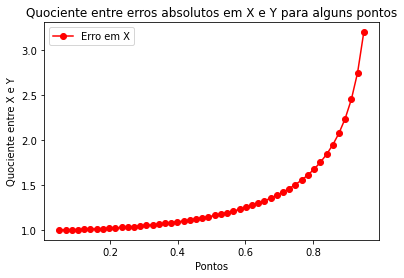

In [13]:
ys = np.linspace(0.05,0.95, num=50)
xs3 = xs / xs2 #Erro em x sobre erro em y
plt.plot(ys,xs3,'ro-',label='Erro em X')
plt.title('Quociente entre erros absolutos em X e Y para alguns pontos')
plt.xlabel('Pontos')
plt.ylabel('Quociente entre X e Y')
plt.legend()

Como este gráfico ajuda a explicar o anterior?

Sabemos que a $sen(x) \approx x$ é válida apenas para $x \approx 0$. Assim, no caso em que essa relação é válida, esperamos que a razão entre os erros seja 1. No entanto o gráfico acima mostra que o erro em y dessa aproximação cresce de forma exponencial conforme x se distancia de 0.

# Parte 2: Newton

## Questão 3: Implementação

Escreva uma função `newton_solve(f, df, y, x0)` que encontra uma solução de $f(x) = y$,
a partir de $x_0$.

In [14]:
pts = []
def newton_solve(f, df, y, x0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Newton's algorithm for solving  f(x) = y  starting from  x0.
    Also returns the number of evaluations of f"""
    nevals = 0
    x_at = x0
    pts.append(x_at)
    for iteracao in range(maxiter):
        passo = (f(x_at)-y) / df(x_at)       
        x_at -= passo
        pts.append(x_at)
        nevals += 1
        if abs(f(x_at)-y) < ytol or abs(passo) < xtol:
            nevals += 1
            return x_at,nevals
    return x_at,nevals

### Testes do algoritmo de Newton

In [15]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert np.sin(z1) <= 1e-8 or abs(np.arcsin(0.5) - z1) < 1e-8
assert np.sin(z2) <= 1e-8 or abs(np.arcsin(0.5) - z2) < 1e-8

In [16]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert 3 <= n1 <= 6
assert 3 <= n2 <= 6

In [17]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert z1 == z2
assert n1 == n2 + 1

Explique os testes da caixa acima, e compare com o teste equivalente para a bisseção.

Assim como na bisseção, o primeiro assert apenas verifica que a solução encontrada é a mesma para os dois pontos de início.
Vamos avaliar o que acontece quando começamos o método em $x{0} = 0$.
Fazendo o passo, teremos que $x{1} = - \frac{f(0)-0.5}{f'(0)}$, mas sabemos que $f'(0) = cos(0) = 1$ e $f(0) = sen(0) = 0$, entao $x_{1} = 0.5$.
Agora,basta observar que esse é exatamente o ponto de início do outro teste. Portanto, teremos exatamente uma iteração a mais caso comecemos em $x = 0$, o que é vericado por assert n1 == n2 + 1.

### E mais testes...

In [18]:
z0, n0 = newton_solve(np.sin, np.cos, 0.5, 0)

for n in range(1,100):
    z1, n1 = newton_solve(np.sin, np.cos, 0.5, 2*n*np.pi)
    assert np.sin(z1) <= 1e-8 or abs(2*n*np.pi + np.arcsin(0.5) - z1) < 1e-8, n
    assert 2 <= n1 <= 6, n
    assert n1 == n0, n
    assert np.isclose(z1, z0 + (2*n*np.pi), atol=1e-15, rtol=1e-15), n

Comente a caixa anterior.

Notamos que a caixa acima executa testes variando o x inicial de $2\pi$ em $2\pi$. Dessa forma esperamos que a cada iteração encontremos uma raiz exatamente igual a anterior, embora deslocada de $2\pi$. O teste abs(2*n*np.pi + np.arcsin(0.5) - z1) < 1e-8 verifica se z1 está próximo da solução exata para a n-ésima iteração, isto é, se z1 está perto o suficiente da raiz exata para o domínio da função, dada por np.arcsin(0.5), somada de $2n\pi$. Por outro lado o teste com np.isclose calcula internamente se absolute(z1 - (z0 + 2\*n\*np.pi) ) <= (atol + rtol * absolute(z0+(2\*n\*np.pi) ) ), retornando True em caso positivo. Esse último teste é similar ao anterior, no entanto além da tolerância absoluta, ele leva em conta também a tolerância relativa. Isso é muito útil pois errar em 1 unidade para uma raiz que é 1.000.000 é muito melhor do que errar em 1 unidade quando a raiz é 2 por exemplo, e a tolerância relativa leva isso em conta. 

## Questão 4: Gráficos

Varie $y$ no intervalo $[0.05, 0.95]$ e faça o gráfico do número de iterações,
em função de y, para encontrar uma raiz de $\sin(x) = y$ no intervalo $[-\pi/2, \pi/2]$.

Use as tolerâncias padrão.

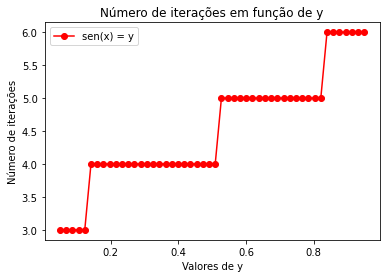

In [19]:
ys = np.linspace(0.05,0.95, num=50)
xs = [newton_solve(np.sin,np.cos,y,0)[1] for y in ys]

plt.plot(ys,xs,'ro-',label='sen(x) = y')
plt.title('Número de iterações em função de y')
plt.ylabel('Número de iterações')
plt.xlabel('Valores de y')
plt.legend()

ax = plt.gca()

In [20]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Comente as diferenças entre este gráfico e o correpondente para a bisseção.

Nesse gráfico, para cada intervalo de valores, há um número fixo de iterações, ao contrário da bisseção, no qual não há nenhum padrão aparente. Aliado a esse fato, também se pode destacar que o número de iterações foi estritamente crescente conforme o ponto y se aproximou de um ponto crítico da $f$(máximo local), fator que não tem influência no método da bisseção. Além disso, podemos afirmar que o algoritmo foi muito mais eficiente, visto que o máximo de iterações usadas foram 6, enquanto na bisseção foram 28.

Como você explica estas diferenças?

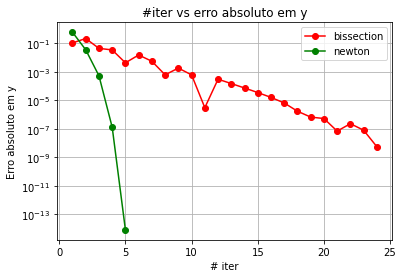

Bissection: [0.10710678118654748, 0.2173165676349102, 0.0444297669803978, 0.03439328416364551, 0.004300695507566621, 0.015231590580626841, 0.005511041404325567, 0.0006164793838689953, 0.0018392930036575939, 0.000610701599435326, 3.0653753890774738e-06, 0.0003037740137915579, 0.00015034329182272987, 7.363620101963342e-05, 3.52847234719178e-05, 1.610950170005676e-05, 6.522020069565926e-06, 1.7283115686383965e-06, 6.68534603120996e-07, 5.298878095194581e-07, 6.932356522160177e-08, 2.3028208007147555e-07, 8.047924693332931e-08, 5.57783819132851e-09] 
 Newton: [0.6, 0.035357526604964606, 0.0005288737514856923, 1.3090605899268581e-07, 8.104628079763643e-15]


In [21]:
def newton_teste(f, df, y, x0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Newton's algorithm for solving  f(x) = y  starting from  x0.
    Also returns the number of evaluations of f"""
    nevals = 0
    x_at = x0
    lista = [x_at]
    for iteracao in range(maxiter):
        passo = (f(x_at)-y) / df(x_at)
        x_at -= passo
        nevals += 1
        lista.append(x_at)
        if abs(f(x_at)-y) < ytol or abs(passo) < xtol:
            nevals += 1
            return lista,x_at,nevals
    return lista,x_at,nevals

def biss_teste(f, y, a, b, xtol=1e-8, ytol=1e-8):
    """Bissects the interval  [a,b]  until an approximate solution to  f(x) = y  is found.
    Also returns the number of bissections"""
    #Implementar checagem para ver se há solução
    m = (a+b)/2
    nbiss = 1
    lista = [m]
    #Checar se a função é decrescente
    if f(b) < f(a):
         while not abs(f(m)-y) < ytol or abs(b-a) < xtol:
            if f(m) > y: #Nesse caso, temos que pensar 'ao contrário'
                a = m
            else:
                b = m
            m = (a+b) / 2
            nbiss += 1
            lista.append(m)
    #Se for crescente        
    else: 
        while not abs(f(m)-y) < ytol or abs(b-a) < xtol:
            if f(m) < y: #Procedimento padrão
                a = m
            else:
                b = m
            m = (a+b) / 2
            nbiss += 1
            lista.append(m)
    return lista, m, nbiss


a = biss_teste(np.sin,0.6,0,np.pi/2)[0]
a1 = [abs(np.sin(az) - 0.6) for az in a]
b = newton_teste(np.sin,np.cos,0.6,0)[0]
b2 = [abs(np.sin(bz) - 0.6) for bz in b]
plt.semilogy(np.arange(1,len(a1) + 1),a1,'ro-',label='bissection')
plt.semilogy(np.arange(1,len(b2) + 1),b2,'go-',label='newton')
plt.legend()
plt.grid()
plt.xlabel('# iter')
plt.ylabel('Erro absoluto em y')
plt.title('#iter vs erro absoluto em y')
plt.show()
print(f'Bissection: {a1}','\n',f'Newton: {b2}')

Text(0.5, 1.0, 'Razão de convergencia')

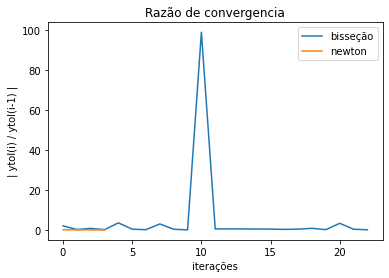

In [22]:
ax = plt.gca()
r_f = [np.abs(a1[i]/a1[i-1]) for i in range(1,len(a1))]
r_g = [np.abs(b2[i]/b2[i-1]) for i in range(1,len(b2))]
ax.plot(np.arange(len(a1) - 1), r_f, label="bisseção")
ax.plot(np.arange(len(b2) - 1), r_g, label="newton")
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("| ytol(i) / ytol(i-1) |") 
ax.set_title("Razão de convergencia")

Observando o gráfico e as correspondentes listas acima, podemos perceber que a redução do erro em y para o método de newton é de ordem quadrática, enquanto no método da bisseção é de ordem linear, o que explica a diferença de eficiência.
Note também que o erro do último ponto no método de Newton é muito inferior à tolerância mínima exigida. Então, dado que a função é localmente contínua e monótona, para valores de y próximos ao escolhido, o número de iterações será o mesmo. Isso não ocorre na bisseção, já que, em geral, a quantidade de iterações está relacionada ao tamanho do intervalo passado.

Faça, agora, o gráfico do erro em $x$ (usando `np.arcsin`) e em $y$.

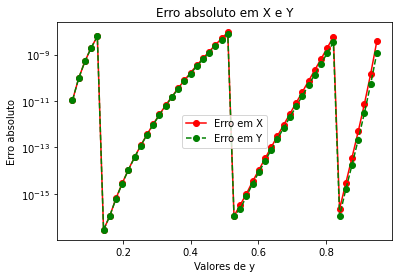

In [23]:
ys = np.linspace(0.05,0.95, num=50)
xs = np.abs([newton_solve(np.sin,np.cos,y,0)[0] - np.arcsin(y) for y in ys]) #Erro em x
xs2 = np.abs([np.sin(newton_solve(np.sin,np.cos,y,0)[0]) - y for y in ys]) #Erro em y
plt.plot(ys,xs,'ro-',label='Erro em X')
plt.plot(ys,xs2,'go--',label='Erro em Y')
plt.semilogy()
plt.title('Erro absoluto em X e Y')
plt.ylabel('Erro absoluto')
plt.xlabel('Valores de y')
plt.legend()

ax = plt.gca()

In [24]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você percebe neste gráfico?
Em que sentido ele é similar ao correspondente à bisseção, e em que sentido ele é diferente?

Primeiramente, vamos analisar o gráfico. Podemos notar uma certa "periodicidade" no erro,  que é ocasionada pela tolerância passada.
Observe o quinto ponto do gráfico acima: ele está no limite da nossa tolerância($10^{-8}$), então se quisermos encontrar uma raiz mais à direita, começando do mesmo ponto, teremos que fazer mais uma iteração do método. Como esse método reduz o erro quadraticamente, obtemos um erro da ordem de $10^{-16}$, o que explica a queda abrupta no gráfico do quinto para o sexto ponto. Continuando o processo, ou seja, procurando raízes mais à direita, o mesmo fenômeno ocorre, porém como o erro anterior aumenta(isso é, sendo o ponto encontrado pelo método $x_i$, abs$(x_{i-1})$ - arcsin(y) aumenta), então ao reduzirmos esse erro quadraticamente, obteremos um erro maior, o que é representado graficamente pela curva crescente a partir do sexto ponto. Esse 'comportamento periódico' do erro continua e o intervalo entre os 'saltos' se torna mais frequente aos nos aproximarmos de um ponto crítico de $f$.
Uma similaridade com o gráfico da bisseção, é que nos dois o erro em x é maior que o erro em y conforme y aumenta.
Além da diferença na 'periodicidade do erro', também podemos observar que o erro inferior médio do método do newton é muito inferior ao da bisseção

# Parte 3: Aproximações sucessivas

O método de Newton funciona bem quando o valor de $x_0$, candidato a raiz de $f(x) = y$,
está próximo da raiz real $x = f^{-1}(y)$.

Nesta parte, vamos investigar um pouco a ideia de "começar em um ponto conhecido e seguir daí em diante".

## Questão 5: Newton por partes

Implemente a função `newton_inv(f, df, ys, x0)`, que calcula todas as soluções de $f(x) = y$,
para cada $y$ no vetor `ys`, que supomos ordenado.
Use $x_0$ para iniciar o método, e depois use a raiz anterior para continuar.

In [25]:
def newton_inv(f, df, ys, x0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Newton's algorithm for solving  f(x) = y  for each  y  in the list  ys.
    Returns two lists, one of the (approximate) roots, another of the iterations for each one."""
    xs     = []
    nevals = []
    for y in ys:
        if len(xs) != 0: #Se já tivermos valor no cache, vamos usá-lo como ponto inicial
            x_at = xs[-1]
        else: #Se for o primeiro, então usar x0 fornecido
            x_at = x0
        iters = 0
        for iteracoes in range(maxiter):
            passo = (f(x_at)-y) / df(x_at)       
            x_at -= passo
            iters += 1
            if abs(f(x_at)-y) < ytol or abs(passo) < xtol:
                xs.append(x_at)
                nevals.append(iters)
                break #Temos que interromper aqui para adicionar apenas 1 elemento a cada lista para cada y iterado
    return xs, nevals

In [26]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert len(xs) == len(ys)
assert len(ns) == len(ys)

In [27]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert np.allclose(np.sin(xs), ys, atol=1e-12, rtol=1e-12)

In [28]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert ns[0] == 1
assert np.all(3 <= np.array(ns[1:]))
assert np.all(np.array(ns[1:]) <= 6)

In [29]:
ys = np.linspace(0,0.5,num=11)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-15, ytol=1e-15)
assert np.allclose(np.sin(xs), ys, atol=1e-15, rtol=1e-15)

## Questão 6: Gráficos

Faça um gráfico do número de iterações necessárias para calcular a inversa do seno,
em cada ponto do intervalo $[0, 0.9]$, com precisão de $10^{-15}$,
para os três métodos:
- bisseção
- Newton
- Newton por partes

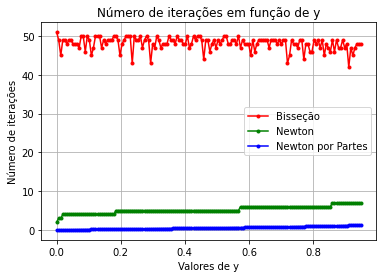

In [30]:
ys = np.linspace(0,0.95, num=150)
xs1 = [biss_solve(np.sin,y,0,np.pi/2,xtol = 1e-15, ytol = 1e-15)[1] for y in ys]
xs2 = [newton_solve(np.sin,np.cos,y,0,xtol = 1e-15, ytol = 1e-15)[1] for y in ys]
xs3 = newton_inv(np.sin,np.cos,ys,0,xtol = 1e-15, ytol = 1e-15)[0]

plt.plot(ys,xs1,'r.-',label='Bisseção')
plt.plot(ys,xs2,'g.-',label='Newton')
plt.plot(ys,xs3,'b.-',label='Newton por Partes')

plt.title('Número de iterações em função de y')
plt.ylabel('Número de iterações')
plt.xlabel('Valores de y')
plt.legend()
plt.grid()

ax = plt.gca()

In [31]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você observa?

A priori, podemos observar que o método de Newton por partes é o mais eficiente entre os três, para todos os casos, sendo ambos extremamente superiores à bisseção.\
Outro ponto que é possível avaliar, é que enquanto a bisseção não parece ter um padrão para o número de iterações em relação ao y, tanto o método de Newton comum quanto o por partes, parecem apresentar resultados mais padronizados. Podemos observar, por exemplo, que o número de iterações cresce estritamente enquanto o y se aproxima de um ponto crítico da função $f$. Além disso, para todos os pontos num certo intervalo, o método necessita do mesmo número de iterações, enquanto na bisseção não há relação aparente.

## Questão 7: Logaritmos e Exponenciais

In [32]:
def mulinv(x):
    return 1/x

In [33]:
x, n = newton_solve(np.log, mulinv, -0.1, 1)
assert np.isclose(np.log(x), -0.1)

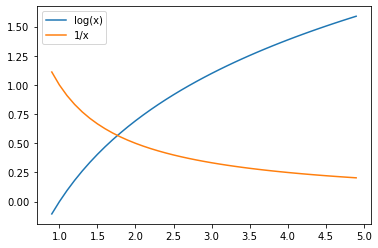

In [34]:
x = np.arange(0.9,5,0.1)
y = np.log(x)
d_y = [mulinv(a) for a in x]
plt.plot(x,y,label="log(x)")
plt.plot(x,d_y,label="1/x")
plt.legend()

In [35]:
for y in [0.9, 0.99, 0.999, 0.9999, 0.99999]:
    print(y, newton_solve(np.log, mulinv, -y, 1))

0.9 (0.4065696597090395, 7)
0.99 (0.3715766910220403, 9)
0.999 (0.36824750461324673, 10)
0.9999 (0.36791623095413534, 11)
0.99999 (0.36788311998397466, 12)


In [36]:
pts

[0,
 0.5,
 0.523444473818484,
 0.5235987687270579,
 0.5,
 0.523444473818484,
 0.5235987687270579,
 0,
 0.5,
 0.523444473818484,
 0.5235987687270579,
 0.5,
 0.523444473818484,
 0.5235987687270579,
 0,
 0.5,
 0.523444473818484,
 0.5235987687270579,
 0.5,
 0.523444473818484,
 0.5235987687270579,
 0,
 0.5,
 0.523444473818484,
 0.5235987687270579,
 6.283185307179586,
 6.783185307179586,
 6.806629780998071,
 6.806784075906644,
 12.566370614359172,
 13.066370614359172,
 13.089815088177657,
 13.089969383086231,
 18.84955592153876,
 19.34955592153876,
 19.373000395357245,
 19.373154690265817,
 25.132741228718345,
 25.632741228718345,
 25.65618570253683,
 25.656339997445404,
 31.41592653589793,
 31.91592653589793,
 31.939371009716417,
 31.93952530462499,
 37.69911184307752,
 38.19911184307752,
 38.222556316896004,
 38.22271061180458,
 43.982297150257104,
 44.482297150257104,
 44.50574162407559,
 44.505895918984166,
 50.26548245743669,
 50.76548245743669,
 50.788926931255176,
 50.78908122616375,


In [37]:
newton_solve(np.log, mulinv, -1.0, 1)

<ipython-input-14-fac237ca5ad5>:13: RuntimeWarning: divide by zero encountered in log
  if abs(f(x_at)-y) < ytol or abs(passo) < xtol:
<ipython-input-14-fac237ca5ad5>:9: RuntimeWarning: divide by zero encountered in log
  passo = (f(x_at)-y) / df(x_at)
<ipython-input-32-0e19534225df>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/x
<ipython-input-14-fac237ca5ad5>:9: RuntimeWarning: invalid value encountered in double_scalars
  passo = (f(x_at)-y) / df(x_at)


(nan, 100)

Explique o que aconteceu nas duas caixas acima.

Conforme buscamos a solução da equação log(x) = y, para y tendendo a -1 pela esquerda, temos que o resultado converge 0.3678, que corresponde as 4 primeiras decimais de 1/e. Contudo, ao colocarmos y = -1, temos que o passo $h(x_0)/h'(x_0)$, sendo $h(x) = \log(x) - y$, será dado por: $\frac{\log(1) - ( -1)}{1} = 1$. Assim, $x_1$, dado por $x_1 = x_0 - h(x_0)/h'(x_0)$, na próxima iteração será igual a $x_1 = 1 - 1 = 0$. Como a cada iteração o passo é calculado aplicando $h(x) = \log(x) - y$ e $h'(x) = 1/x$, teremos que na iteração seguinte uma indeterminação uma vez que nem a função $h(x) = log(x)$ nem $h'(x) = 1/x$ estão definidas para x=0. Assim, gera-se erro ao calcular o erro em y, $|h(x)|$, e ao calcular o passo $h(x)/h'(x)$.

In [38]:
print(newton_solve(np.log, mulinv, -1.99999, 1/np.e))
print(newton_solve(np.log, mulinv, -2.0, 1/np.e))

(0.13533663659611128, 12)
(nan, 100)


<ipython-input-14-fac237ca5ad5>:13: RuntimeWarning: divide by zero encountered in log
  if abs(f(x_at)-y) < ytol or abs(passo) < xtol:
<ipython-input-14-fac237ca5ad5>:9: RuntimeWarning: divide by zero encountered in log
  passo = (f(x_at)-y) / df(x_at)
<ipython-input-32-0e19534225df>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/x
<ipython-input-14-fac237ca5ad5>:9: RuntimeWarning: invalid value encountered in double_scalars
  passo = (f(x_at)-y) / df(x_at)


In [39]:
np.exp(-10)

4.5399929762484854e-05

In [40]:
pts = []
newton_solve(np.log, mulinv, -10, np.exp(-9.1))
pts

[0.00011166580849011478,
 1.1166580849011434e-05,
 2.6828660687547712e-05,
 4.094160434507954e-05,
 4.517348377093612e-05,
 4.539936408699653e-05,
 4.539992975896073e-05]

Explique porque esta caixa é semelhante às anteriores,
e o que isso sugere quanto à dificuldade de resolver, usando o método de Newton,
a equação $\log(x) = y$ para $y$ negativo.

Essa caixa é semelhante às anteriores no sentido em que eventualmente em uma das iterações o valor de x chega próximo a 0 ou chaga até a ser negativo. A dificulde reside no fato de que para valores de y negativos, temos que eventualmente durante a execução do algoritmo o valor de x fica entre 0 e 1. Para o caso do log, temos que o valor de x é atualizado por $x = x - (\log(x) - y)x = x(1 -\log(x) + y)$. Dessa forma, considerando que o x inicial é positivo, o seu sinal só inverte quando $1 - \log(x) + y < 0$. Quando isso ocorre na próxima iteração teremos um erro pois log(x) não está definido para $x \leq 0$. Assim, para evitar isso é necessário que o x inicial seja tal que $\begin{equation} 
1 - \log(x) > - y =\\
-log(x) > -y - 1 =\\
x < exp(y+1)
\end{equation}$

In [41]:
ys = np.linspace(0,20,num=30)
xs, ns = newton_inv(np.log, mulinv, -ys, 1, xtol=1e-15, ytol=1e-15)
assert np.allclose(np.log(xs), -ys)

In [42]:
np.exp(- 0.68965517)

0.5017490573660152

Explique porque o método de aproximações funciona.

O método funciona pois a cada y encontramos uma raiz ainda mais próxima que servirá de ponto de partida para o próximo y. Seja $x_{n-1}^*$ a raiz encontrada pelo método para $Y_{n-1}$, logo $\log(x_{n-1}^*) \approx Y_{n-1}$. Colocando na equação encontrada anteriormente, temos que a diferença entre $Y_{n-1}$ e $Y_n$ a fim de que o algoritmo não encontre x negativo deve ser tal que: 
$\begin{equation}
-\log(x_{n-1}^*) > - Y_n - 1\\ 
-Y_{n-1} > -Y_n -1\\
-(Y_n - Y_{n-1}) < 1
\end{equation}$ Como a diferença entre cada $Y_n$ e $Y_{n-1}$ é na ordem de 2/3 < 1, temos que a condição é satisfeita.

Qual seria a dificuldade para adaptar o método de "aproximação sucessiva" para a Bisseção?

A dificuldade está em encontrar um outro ponto "b", além daquele retornado pela raiz "a" na iteração anterior, de forma que sign(f(a)) = -1*sign(f(b)). Além disso, se usássemos o mesmo valor do extremo da iteração anterior, de forma que sign(f(a)) = -1*sign(f($extremo_{n-1}$)), apenas se "a" estiver extremamente próximo da nova raiz é que a bisseção terá uma quantidade de iterações bem menor.

## Questão 8: Uma função parecida

Resolva a equação $\log(x) + 10^9 x = -20$.

In [43]:
def f(x):
    return np.log(x) + 1e9*x
def df(x):
    return 1/x + 1e9

In [44]:
x = biss_solve(f,-20,1e-16,1e-2,xtol=1e-23,ytol=1e-23)[0]

In [45]:
assert np.isclose(f(x), -20, atol=1e-13, rtol=1e-13)